In [1]:
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage
import scipy

from scipy import ndimage
from sklearn.cluster import MeanShift, estimate_bandwidth

In [4]:
mice_img = 'mice.jpg'

### Фильтр Гаусса

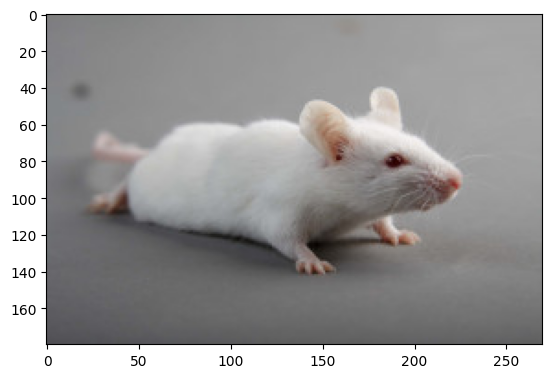

In [5]:
pic = PIL.Image.open(mice_img)
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
plt.imshow(pic)
plt.show()

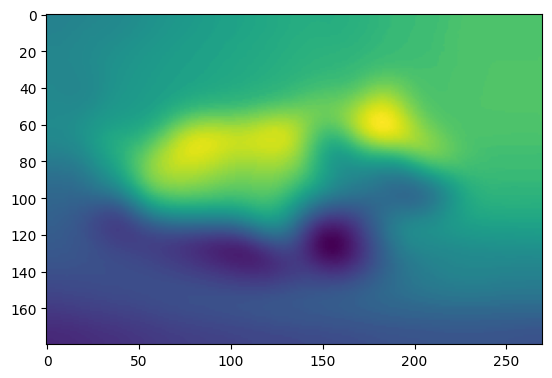

In [6]:
plt.imshow(PIL_image)
plt.show()

### Фильтр Робертса

('R', 'G', 'B')
('L',)


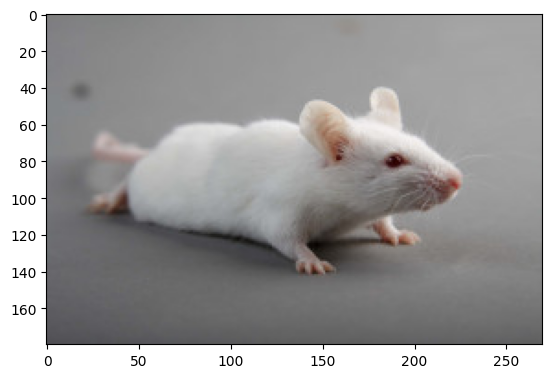

In [7]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])

filename = mice_img
with PIL.Image.open(filename) as pix:
    pix.load()
 
plt.imshow(pix)
b = pix.getbands()
print(b)

pix = pix.convert("L")
 
b = pix.getbands()
print(b)

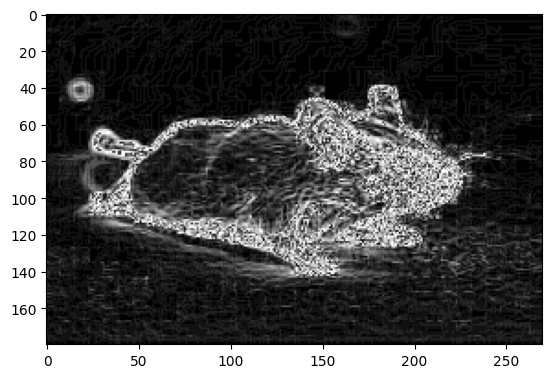

In [8]:
vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

 
PIL_image = PIL.Image.fromarray(np.uint8(edged_img))

plt.imshow(PIL_image,cmap=plt.cm.gray)
plt.show()

### Фильтр Прюитт

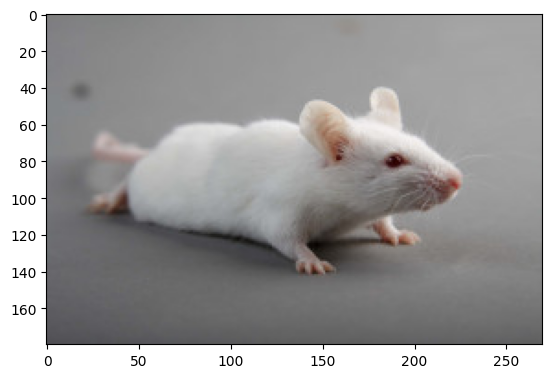

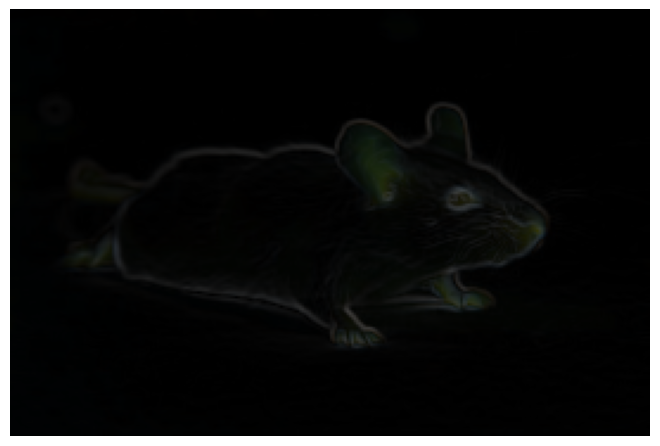

In [9]:
pic = PIL.Image.open(mice_img)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

plt.imshow(pic, cmap=plt.cm.gray, aspect='equal')
plt.show()

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result, cmap=plt.cm.gray, aspect='equal')
plt.show()

### Фильтр Собеля

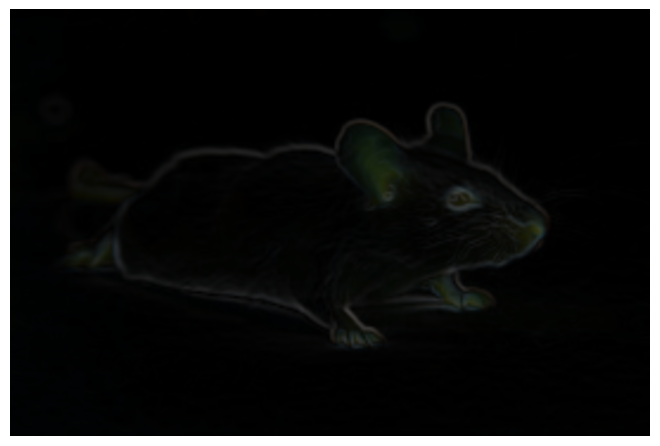

In [10]:
pic = PIL.Image.open(mice_img)
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.sobel(pix)
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(result, cmap=plt.cm.gray, aspect='equal', interpolation="mitchell")
plt.show()

### Фильтр Лапласа

In [11]:
def LoG_filter(image, sigma, size=None):
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread(mice_img, cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

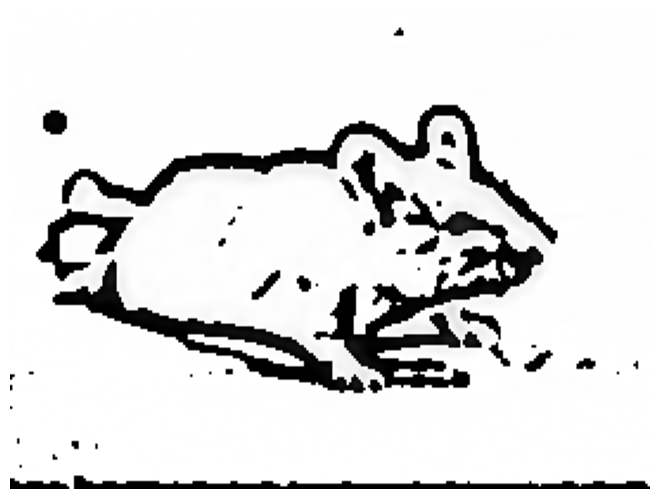

In [12]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(filtered_image, cmap=plt.cm.gray, aspect='auto')
plt.show()

## Выделение областей

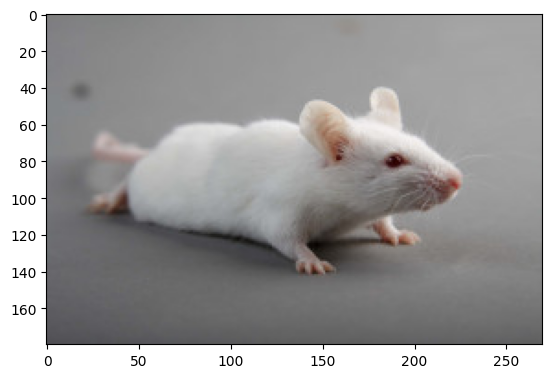

In [13]:
image = PIL.Image.open(mice_img).convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')
plt.show()

img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

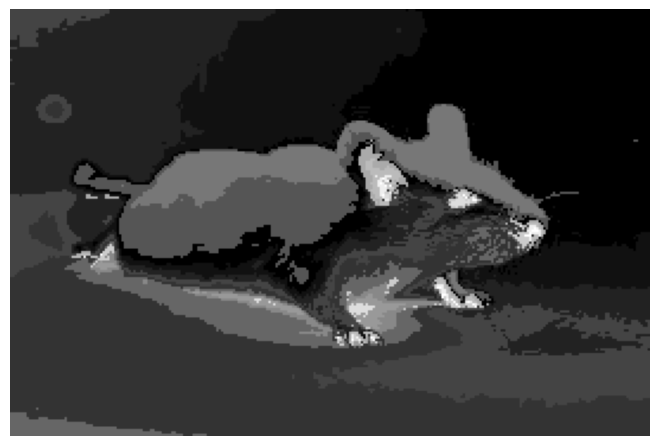

In [14]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
plt.show()

### Floodfill

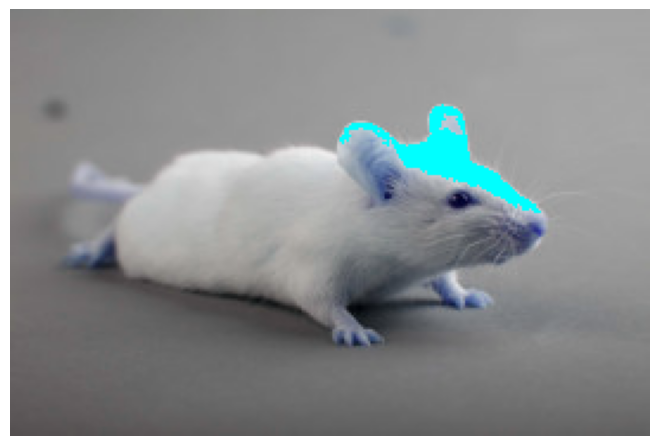

In [15]:
img = cv2.imread(mice_img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.show()

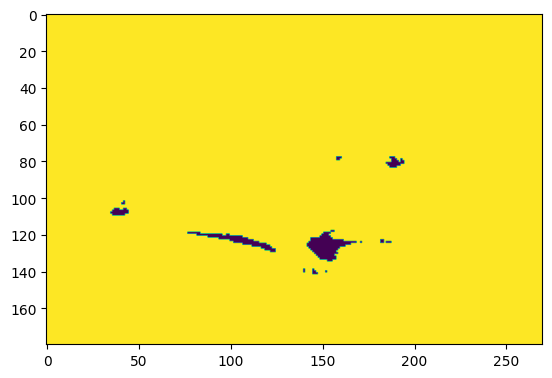

In [16]:
image = cv2.imread(mice_img)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
plt.imshow(im)
plt.show()

## Зашумление и удаление шумов

### Гауссов шум

In [17]:
img = cv2.imread(mice_img)
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape) 
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

In [18]:
gauss_noise_test = img_noised

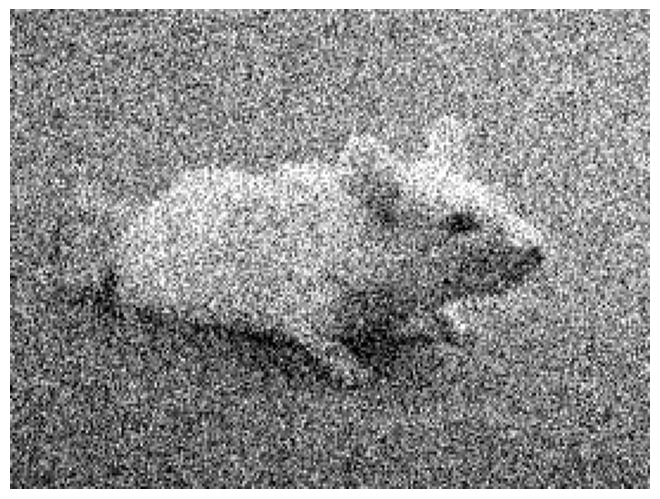

In [19]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)
plt.show()

### Импульсный шум

In [20]:
x = np.arange(0, 360, 1)
y = np.sin(np.deg2rad(x))

noise_sample = np.random.default_rng().uniform(0.2*min(y), 0.3*max(y), int(0.03*len(y)))
zeros = np.zeros(len(y) - len(noise_sample))
noise = np.concatenate([noise_sample, zeros])
np.random.shuffle(noise)
y_noised = y + noise

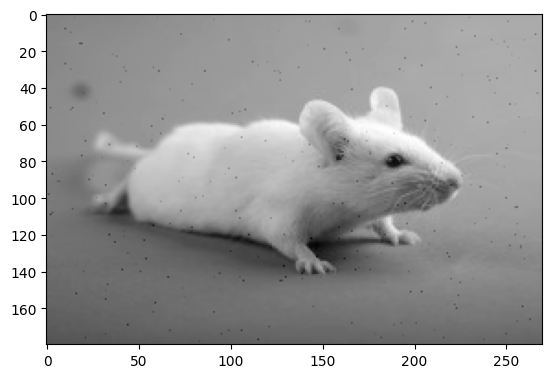

In [21]:
image = cv2.imread(mice_img)
 
h, w = image.shape[:2]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

s = 300

noise_sample = np.random.default_rng().uniform(low=200, high=250, size=s)
 
rs1 = np.random.randint(0,gray.size/h-1,s)
rs2 = np.random.randint(0,gray.size/w-1,s)

j = 0

for i in noise_sample:
    gray[rs2[j]][rs1[j]] += i
    j += 1

plt.imshow(gray, cmap=plt.cm.gray, aspect='equal')
plt.savefig("impulse_noise.jpg", dpi=300)
plt.show()

### Шум соли и перца (Salt-and-Pepper)

In [22]:
img_size = img_gray.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
img_noised = img_gray.copy()
noise = np.random.choice([img_gray.min(), img_gray.max()], noise_size)
img_noised.flat[random_indices] = noise

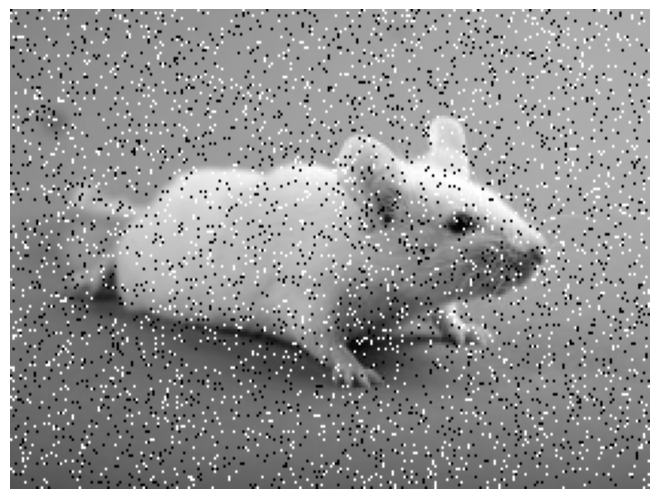

In [23]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("saltnpepper_noise.jpg", dpi=300)
plt.show()

### Удаление шума из изображения

In [24]:
img = cv2.imread('gauss_noise_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)

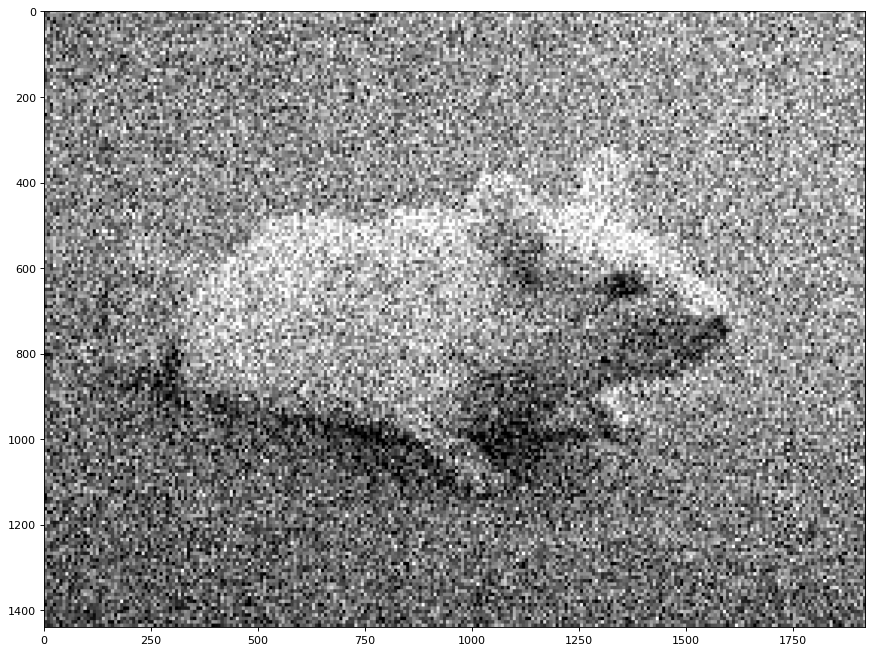

In [25]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(img)
plt.show()

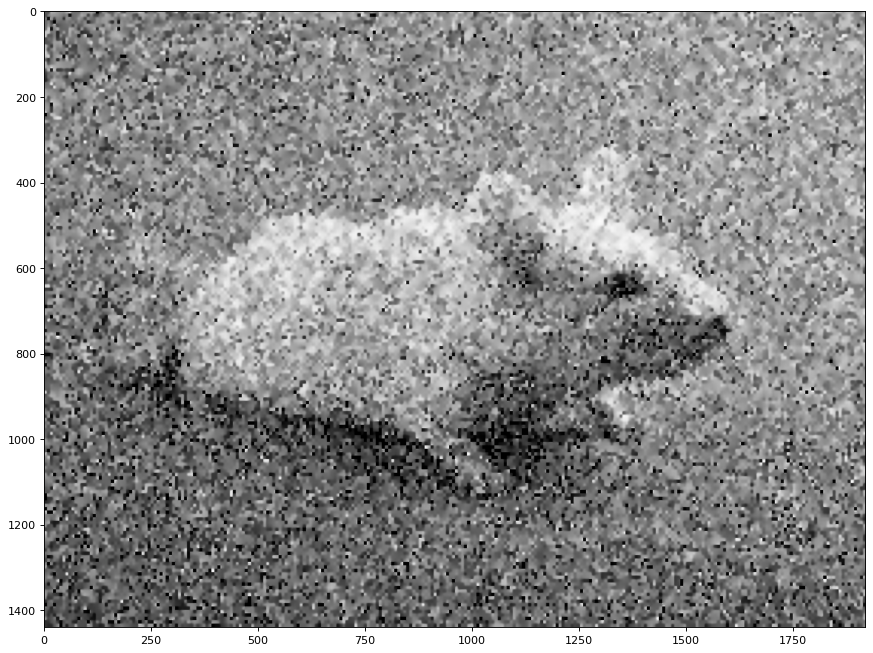

In [26]:
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)
plt.show()

In [27]:
img = cv2.imread('impulse_noise.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 15, 10, 7, 21)

<Figure size 1200x1200 with 0 Axes>

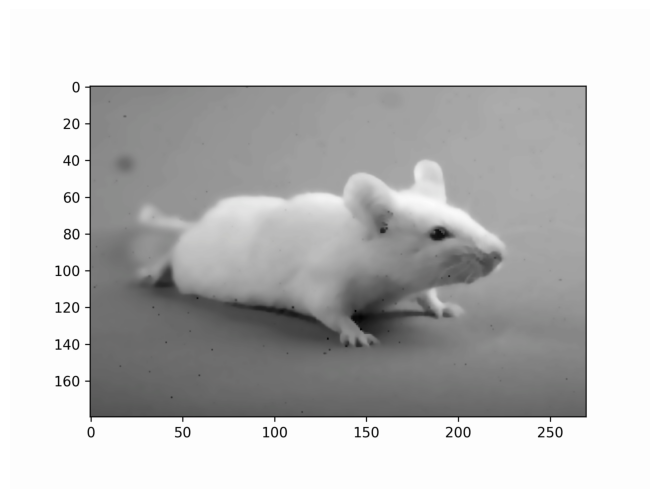

In [28]:
plt.figure(figsize=(12, 12))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(dst[...,::-1] / 255.0, aspect='auto')
plt.savefig("impulse_noise.jpg", dpi=300)
plt.show()

## Классификация

### модели ResNet

In [27]:
import tensorflow
import torch
import torchvision
import os
import pandas as pd
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

In [28]:
classes = os.listdir(os.path.abspath('') + '/mammals')

In [29]:
print(classes)

['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'seal', 'sea_lion', 'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']


In [541]:
train_images = []
test_images = []
val_images = []

test_size = 0.2

In [542]:
compose = transforms.Compose([transforms.PILToTensor()])

In [543]:
compose_to = 128

In [544]:
for j in range(len(classes)):
    cl = classes[j]
    img_names = os.listdir(os.path.abspath('') + '/mammals/' + cl)
    for i in range(len(img_names)):
        name = img_names[i]
        tmp = Image.open(os.path.abspath('') + '/mammals/' + cl + '/' + name)
        tmp = tmp.resize((compose_to, compose_to))
        img = tmp.copy()
        if i < int(len(img_names) * (1 - test_size)):
            if i < int(len(img_names) * (1 - test_size) * (1 - test_size)):
                train_images += [[img, j]]
            else:
                test_images += [[img, j]]
        else:
            val_images += [[img, j]]
        tmp.close()

In [545]:
for i in range(len(train_images)):
    train_images[i] = (compose(train_images[i][0]), train_images[i][1])

for i in range(len(test_images)):
    test_images[i] = (compose(test_images[i][0]), test_images[i][1])

for i in range(len(val_images)):
    val_images[i] = (compose(val_images[i][0]), val_images[i][1])

In [546]:
import random

random.shuffle(train_images)

In [547]:
train_dataset = pd.DataFrame(train_images)
test_dataset = pd.DataFrame(test_images)
val_dataset = pd.DataFrame(val_images)

In [548]:
print(train_dataset.tail())

                                                      0   1
8768  [[[tensor(146, dtype=torch.uint8), tensor(145,...  31
8769  [[[tensor(166, dtype=torch.uint8), tensor(150,...  10
8770  [[[tensor(136, dtype=torch.uint8), tensor(144,...   2
8771  [[[tensor(44, dtype=torch.uint8), tensor(44, d...  19
8772  [[[tensor(4, dtype=torch.uint8), tensor(15, dt...  19


In [549]:
batch_size = 32
epochs = 200
data_augmentation = True
num_classes = len(classes)
lr = 1e-04

subtract_pixel_mean = True
n = 3

depth = n * 9 + 2

model_type = f'ResNet {depth}'

train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size, shuffle=True,
        num_workers=4, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=128, shuffle=False,
        num_workers=4, pin_memory=True)

In [550]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

   sugar_glider        squirrel           camel           zebra        anteater           tapir african_elephant            seal


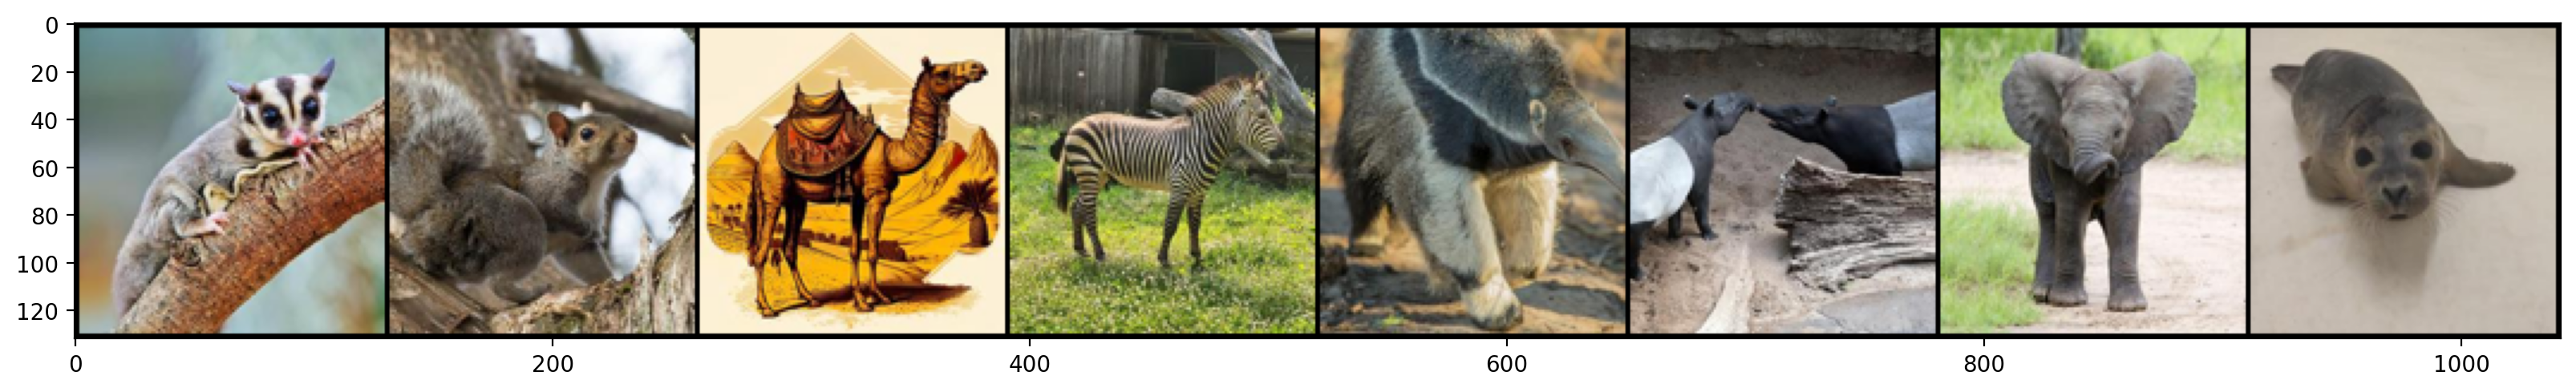

In [551]:
images, labels = list(train_dataset[0].to_numpy()), train_dataset[1].to_numpy()
plt.figure(figsize=(20,10)) 

imshow(torchvision.utils.make_grid(images[:8]))

print(' '.join('%15s' % classes[labels[j]] for j in range(8)))

In [552]:
train_data, test_data = torch.utils.data.random_split(train_loader.dataset, [0.8,  0.2])

In [553]:
def split_to_x_y(dataset):
    x_ = []
    y_ = []
    for i in range (len(dataset)):
        x_.append(torch.transpose(dataset[i][0], 0, 2))
        y_.append(dataset[i][1])
    return x_, y_  

In [554]:
print(len(train_data))

7019


In [555]:
x_train, y_train = split_to_x_y(train_dataset.to_numpy())
x_test, y_test =  split_to_x_y(test_dataset.to_numpy())

In [556]:
def to_numpy(data):
    data_ = []
    for i in range(0, len(data)):
        data_ += [np.array(data[i])]
    return np.array(data_)

In [557]:
Xtrain = to_numpy(x_train)
Ytrain = to_numpy(y_train)

Xtest = to_numpy(x_test)
Ytest = to_numpy(y_test)

In [558]:
input_shape = Xtrain.shape[1:]
input_shape

(128, 128, 3)

In [559]:
Ytrain = keras.utils.to_categorical(Ytrain, 45)
Ytest = keras.utils.to_categorical(Ytest, 45)

In [560]:
inputs = keras.Input(shape=(compose_to, compose_to, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(128, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x =keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(45, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [561]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [562]:
model.fit(Xtrain, Ytrain, batch_size=64, epochs=60, validation_split=0.2)

Epoch 1/60
110/110 [==============================] - 50s 449ms/step - loss: 4.4287 - accuracy: 0.0345 - val_loss: 3.6680 - val_accuracy: 0.0313
Epoch 2/60
110/110 [==============================] - 72s 660ms/step - loss: 3.6834 - accuracy: 0.0453 - val_loss: 3.6108 - val_accuracy: 0.0467
Epoch 3/60
110/110 [==============================] - 47s 426ms/step - loss: 3.6048 - accuracy: 0.0559 - val_loss: 3.5243 - val_accuracy: 0.0889
Epoch 4/60
110/110 [==============================] - 46s 418ms/step - loss: 3.5474 - accuracy: 0.0765 - val_loss: 3.4251 - val_accuracy: 0.1123
Epoch 5/60
110/110 [==============================] - 74s 673ms/step - loss: 3.4770 - accuracy: 0.0945 - val_loss: 3.3576 - val_accuracy: 0.1328
Epoch 6/60
110/110 [==============================] - 48s 440ms/step - loss: 3.3905 - accuracy: 0.1099 - val_loss: 3.2971 - val_accuracy: 0.1396
Epoch 7/60
110/110 [==============================] - 49s 442ms/step - loss: 3.3010 - accuracy: 0.1322 - val_loss: 3.1627 - val_ac

In [563]:
print(model.evaluate(Xtest, Ytest))

69/69 [==============================] - 3s 49ms/step - loss: 3.0905 - accuracy: 0.4703
[3.090548038482666, 0.4702947735786438]


1/1 [==============================] - 0s 64ms/step
2 0
предсказанный класс american_bison, реальный класс african_elephant


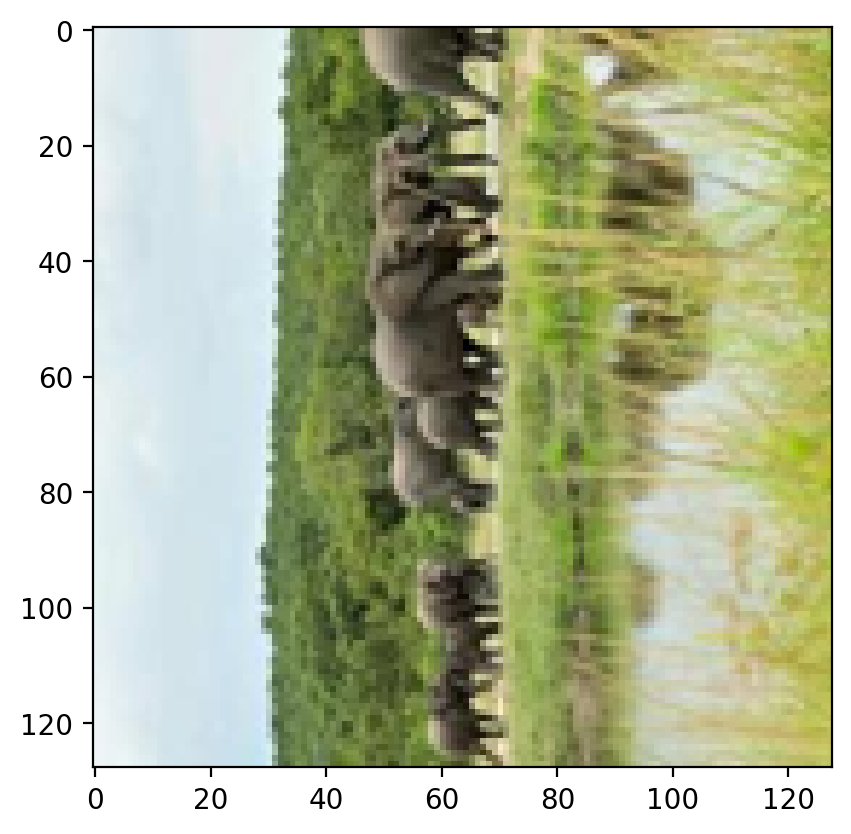

In [564]:
ind = 2
preds = model.predict(np.expand_dims(Xtest[ind], axis=0))[0]

pred_class = max(enumerate(preds),key=lambda x: x[1])[0]
real_class = max(enumerate(Ytest[ind]),key=lambda x: x[1])[0]
print(pred_class, real_class)
plt.imshow(Xtest[ind])
print(f"предсказанный класс {classes[pred_class]}, реальный класс {classes[real_class]}")